# Part 3 - Linear Regression

In this notebook, we will perform linear regression on a dataset we've just created in EDA. The objective is to build an appropriate linear regression model to tell that which hyperparameters are most important in helping the performance of the model.

- Stepwise regression
  
- Model evaluation 
- Model interpretation

> **Note**: this notebook uses R kernel to perform linear regression. If you don't have R kernel for Jupyter, you can just copy and paste the code into R console.

In [40]:
library(leaps)
library(car)

data <- read.csv("data/eda_data.csv")
head(data, 5)


,X,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate_n_estimators,learning_rate_max_depth,n_estimators_max_depth,max_depth_subsample,alpha_lambda,max_depth_min_child_weight,scale_pos_weight_max_depth,max_depth_colsample_bytree
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,0.11861663,915,9,5,0.9216662,0.30814537,0.6040050,0.5648192,0.9611604,3,0.8080999,108.53422,1.0675497,8235,8.294996,0.3411536,45,27,8.650444
2,1,0.28570715,549,4,1,0.9465693,0.02243028,0.8713336,0.3392034,0.9257677,1,0.8185859,156.85322,1.1428286,2196,3.786277,0.2955593,4,4,3.703071
3,2,0.22227824,553,7,5,0.6238469,0.31127350,0.9989047,0.3226837,0.7836637,2,0.8047893,122.91987,1.5559477,3871,4.366929,0.3223303,35,14,5.485646
4,3,0.18361096,728,7,2,0.8768202,0.15445886,0.6077628,0.6449063,0.7007154,3,0.8044808,133.66878,1.2852767,5096,6.137742,0.3919501,14,21,4.905008
5,4,0.05524541,320,8,5,0.6559950,0.18436258,0.4047059,0.8514844,0.7481281,4,0.8071021,17.67853,0.4419632,2560,5.247960,0.3446008,40,32,5.985025


## Stepwise Regression

In this section, we will use `regsubset()` function from the `leaps` package to perform stepwise regression. The `regsubset()` function takes a formula and a data frame as input and returns the best subset of variables that can be used to explain the response variable. The function uses forward selection to select the best variables, and then uses backward elimination to remove the least significant variables.

In [41]:
null_model <- lm(F1 ~ 1, data = data)
full_model <- lm(F1 ~ ., data = data)

fit <- step(null_model,
            scope = list(lower = null_model, upper = full_model),
            direction = "both")


Start:  AIC=-13915.43
F1 ~ 1

                             Df Sum of Sq      RSS    AIC
+ learning_rate_max_depth     1  0.049987 0.090159 -14575
+ scale_pos_weight_max_depth  1  0.041680 0.098466 -14443
+ n_estimators_max_depth      1  0.032286 0.107860 -14306
+ max_depth                   1  0.032029 0.108118 -14303
+ max_depth_colsample_bytree  1  0.028546 0.111600 -14255
+ scale_pos_weight            1  0.025633 0.114513 -14216
+ learning_rate_n_estimators  1  0.022869 0.117278 -14181
+ max_depth_subsample         1  0.018235 0.121912 -14122
+ learning_rate               1  0.016697 0.123449 -14104
+ max_depth_min_child_weight  1  0.010073 0.130074 -14025
+ n_estimators                1  0.006582 0.133565 -13986
+ subsample                   1  0.002943 0.137204 -13945
+ gamma                       1  0.001561 0.138585 -13930
+ alpha                       1  0.000448 0.139699 -13918
<none>                                    0.140146 -13915
+ alpha_lambda                1  0.000103 

In [42]:
summary(fit)


Call:
lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight + 
    n_estimators_max_depth + subsample + learning_rate + scale_pos_weight_max_depth + 
    max_depth + max_depth_subsample + gamma + n_estimators + 
    learning_rate_n_estimators + alpha + colsample_bytree, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0216425 -0.0029052 -0.0001517  0.0027557  0.0175433 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.482e-01  2.960e-03 286.577  < 2e-16 ***
learning_rate_max_depth    -1.348e-02  6.644e-04 -20.285  < 2e-16 ***
scale_pos_weight           -9.883e-03  3.201e-04 -30.873  < 2e-16 ***
n_estimators_max_depth     -2.529e-06  2.267e-07 -11.154  < 2e-16 ***
subsample                  -1.191e-02  3.096e-03  -3.845 0.000126 ***
learning_rate               6.240e-02  5.167e-03  12.078  < 2e-16 ***
scale_pos_weight_max_depth  9.817e-04  5.085e-05  19.305  < 2e-16 ***
max_depth

Remove alpha and colsample_bytree from the model.

In [43]:
fit <- lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight + 
    n_estimators_max_depth + subsample + learning_rate + scale_pos_weight_max_depth + 
    max_depth + max_depth_subsample + gamma + n_estimators + 
    learning_rate_n_estimators, data = data)

summary(fit)


Call:
lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight + 
    n_estimators_max_depth + subsample + learning_rate + scale_pos_weight_max_depth + 
    max_depth + max_depth_subsample + gamma + n_estimators + 
    learning_rate_n_estimators, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0213121 -0.0029127 -0.0002222  0.0026765  0.0183220 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.470e-01  2.837e-03 298.520  < 2e-16 ***
learning_rate_max_depth    -1.350e-02  6.670e-04 -20.238  < 2e-16 ***
scale_pos_weight           -9.905e-03  3.210e-04 -30.856  < 2e-16 ***
n_estimators_max_depth     -2.540e-06  2.276e-07 -11.159  < 2e-16 ***
subsample                  -1.209e-02  3.108e-03  -3.891 0.000104 ***
learning_rate               6.266e-02  5.186e-03  12.080  < 2e-16 ***
scale_pos_weight_max_depth  9.848e-04  5.101e-05  19.305  < 2e-16 ***
max_depth                  -4.779e-0

In [44]:
vif_result <- vif(fit)

# 將VIF結果整理成data.frame
vif_df <- data.frame(
  Variable = names(vif_result),  # 變數名稱
  VIF = round(vif_result, 2)     # VIF值，保留兩位小數
)

vif_df[2]

,VIF
,<dbl>
learning_rate_max_depth,12.53
scale_pos_weight,9.91
n_estimators_max_depth,14.39
subsample,9.93
learning_rate,15.14
scale_pos_weight_max_depth,14.64
max_depth,61.19
max_depth_subsample,57.43
gamma,1.01


Remove scale_pos_weight_max_depth


In [45]:
fit <- lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight +
            subsample  + max_depth_subsample + gamma + n_estimators +
            learning_rate_n_estimators, data = data)

vif_result <- vif(fit)

# 將VIF結果整理成data.frame
vif_df <- data.frame(
  Variable = names(vif_result),  # 變數名稱
  VIF = round(vif_result, 2)     # VIF值，保留兩位小數
)

vif_df[2]

,VIF
,<dbl>
learning_rate_max_depth,4.60
scale_pos_weight,1.00
subsample,1.41
max_depth_subsample,2.51
gamma,1.00
n_estimators,3.07
learning_rate_n_estimators,5.71


In [46]:
summary(fit)


Call:
lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight + 
    subsample + max_depth_subsample + gamma + n_estimators + 
    learning_rate_n_estimators, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0268791 -0.0031555  0.0002673  0.0034410  0.0152459 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.237e-01  1.218e-03 676.367  < 2e-16 ***
learning_rate_max_depth    -8.875e-03  5.003e-04 -17.740  < 2e-16 ***
scale_pos_weight           -3.958e-03  1.265e-04 -31.289  < 2e-16 ***
subsample                   2.022e-02  1.448e-03  13.962  < 2e-16 ***
max_depth_subsample        -1.264e-03  1.274e-04  -9.923  < 2e-16 ***
gamma                       5.900e-03  9.785e-04   6.029 2.07e-09 ***
n_estimators               -9.522e-06  9.753e-07  -9.762  < 2e-16 ***
learning_rate_n_estimators  8.366e-06  5.132e-06   1.630    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 

## Model Evaluation 

Next, we will evaluate the performance of the model. First let's see how well the model fits the training data and the new testing data. We will use the mean squared error (MSE) and the coefficient of determination ($R^2$). 

In [47]:
test <- read.csv("data/testing_set.csv")

# Add interaction terms to the test data
test$learning_rate_n_estimators <- test$learning_rate * test$n_estimators
test$learning_rate_max_depth <- test$learning_rate * test$max_depth
test$n_estimators_max_depth <- test$n_estimators * test$max_depth
test$max_depth_subsample <- test$max_depth * test$subsample
test$alpha_lambda <- test$alpha * test$lambda
test$max_depth_min_child_weight <- test$max_depth * test$min_child_weight
test$scale_pos_weight_max_depth <- test$scale_pos_weight * test$max_depth
test$max_depth_colsample_bytree <- test$max_depth * test$colsample_bytree


head(test, 5)


,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate_n_estimators,learning_rate_max_depth,n_estimators_max_depth,max_depth_subsample,alpha_lambda,max_depth_min_child_weight,scale_pos_weight_max_depth,max_depth_colsample_bytree
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0.13093638,616,5,4,0.6264142,0.4209490,0.02417367,0.1893696,0.6329703,3,0.8138332,80.656811,0.65468191,3080,3.132071,0.004577758,20,15,3.164852
2,0.21889410,819,3,2,0.7563092,0.3194739,0.42040201,0.4098986,0.9413152,4,0.8060458,179.274270,0.65668231,2457,2.268928,0.172322199,6,12,2.823946
3,0.01003317,131,4,4,0.7868954,0.2828157,0.32368941,0.1458626,0.9665317,4,0.7787912,1.314345,0.04013267,524,3.147582,0.047214174,16,16,3.866127
4,0.09767645,840,7,3,0.9580551,0.1535711,0.61949013,0.5623275,0.6852431,1,0.8172348,82.048215,0.68373512,5880,6.706386,0.348356349,21,7,4.796702
5,0.05255921,176,4,1,0.6442230,0.4383885,0.85976307,0.4552318,0.7894888,4,0.8052467,9.250421,0.21023683,704,2.576892,0.391391505,4,16,3.157955


Training MAE: 0.004174318 
Training R-squared: 0.6840006 


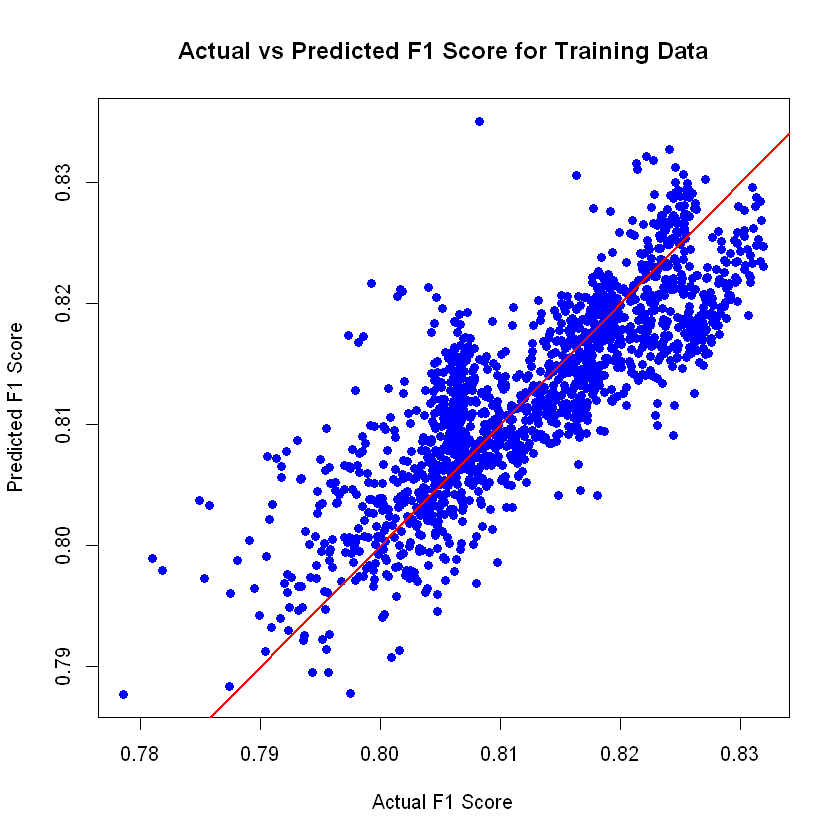

In [48]:
train_predict <- predict(fit, newdata = data)

# MSE
train_mse <- mean((train_predict - data$F1)^2)
# MAE
train_mae <- mean(abs(train_predict - data$F1))
# R-squared
train_r2 <- 1 - (train_mse / var(data$F1))

cat("Training MAE:", train_mae, "\n")
cat("Training R-squared:", train_r2, "\n")

plot(data$F1, train_predict,
     main = "Actual vs Predicted F1 Score for Training Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "blue")
abline(0, 1, col = "red", lwd = 2)


Testing MAE: 0.004125044 
Testing R-squared: 0.6656823 


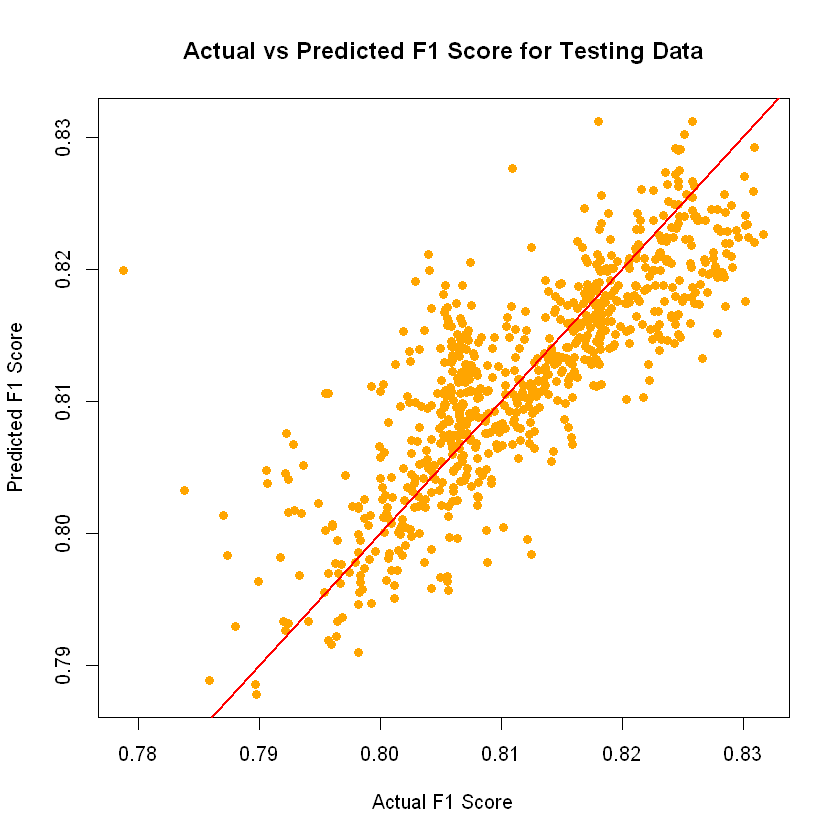

In [49]:
test_predict <- predict(fit, newdata = test)

# MSE
test_mse <- mean((test_predict - test$F1)^2)
# MAE
test_mae <- mean(abs(test_predict - test$F1))
# R-squared
test_r2 <- 1 - (test_mse / var(test$F1))

cat("Testing MAE:", test_mae, "\n")
cat("Testing R-squared:", test_r2, "\n")

plot(test$F1, test_predict,
     main = "Actual vs Predicted F1 Score for Testing Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "orange")
abline(0, 1, col = "red", lwd = 2)

### Model Assumption

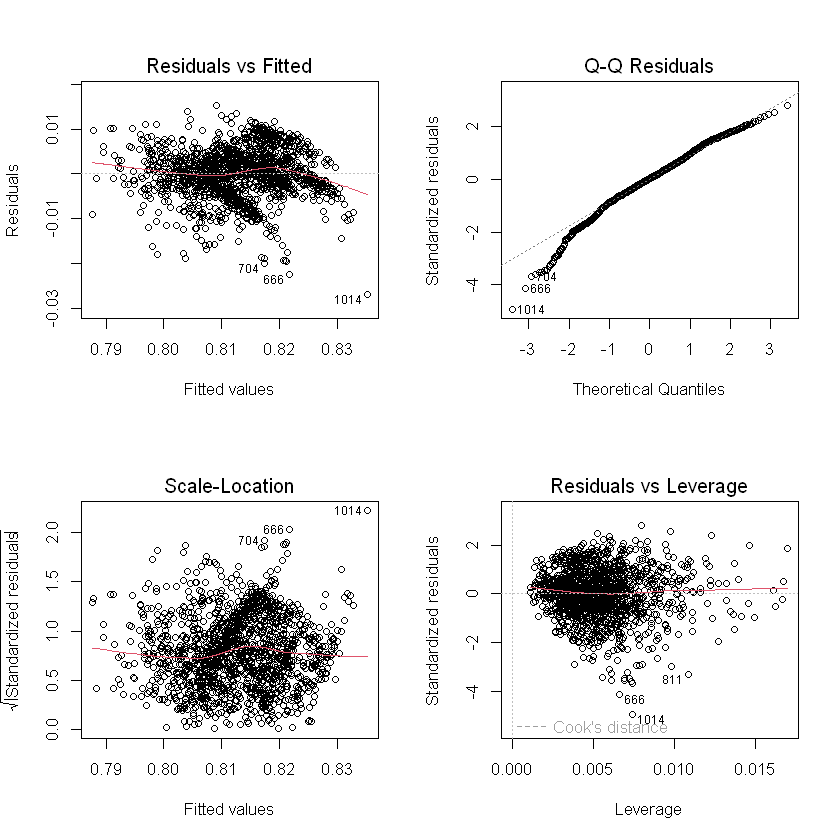

In [50]:
par(mfrow = c(2, 2))
plot(fit)

Remove outliers

In [51]:
leverage <- hatvalues(fit)
high_leverage <- which(leverage > 2 * mean(leverage))

data_clean <- data[-high_leverage, ]

fit <- lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight +
            subsample  + max_depth_subsample + gamma + n_estimators +
            learning_rate_n_estimators, data = data_clean)

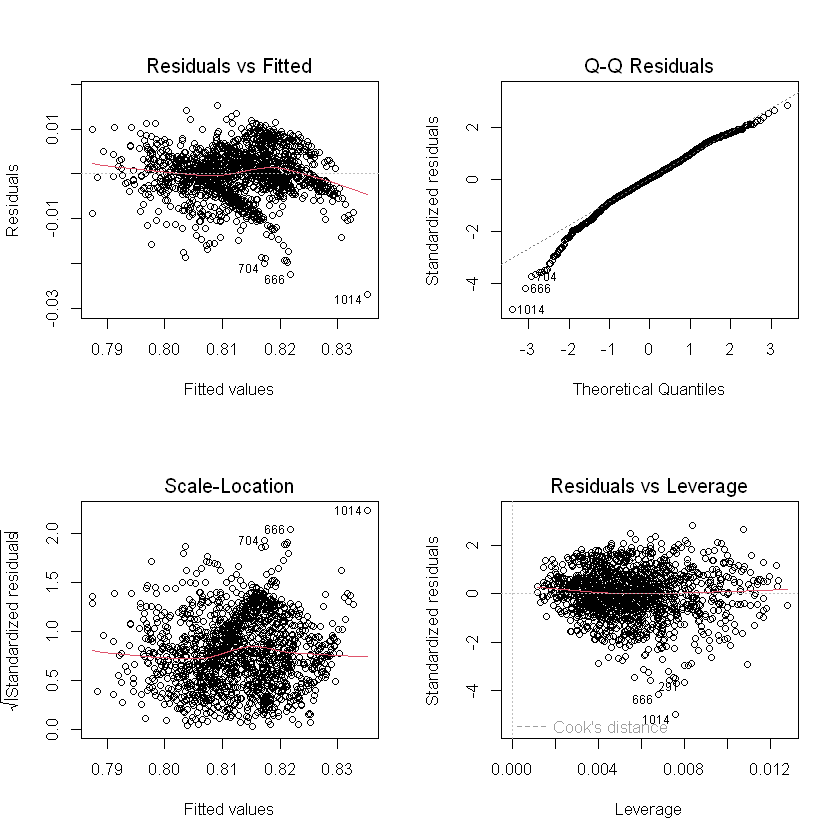

In [52]:
par(mfrow = c(2, 2))
plot(fit)